In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [3]:
# From Covid Tracking API
# https://covidtracking.com/api/
api_us = 'https://covidtracking.com/api/us/daily'
api_states = 'https://covidtracking.com/api/states/daily'

# https://github.com/COVID19Tracking/associated-data
f_pop = 'associated-data/us_census_data/us_census_2018_population_estimates_states.csv'

In [4]:
df_us = pd.read_json(api_us)
df_states = pd.read_json(api_states)
df_pop = pd.read_csv(f_pop)

In [5]:
df_us.shape

(146, 25)

In [6]:
df_states.shape

(5729, 39)

In [7]:
df_pop.head()

,state,state_name,geo_id,population,pop_density
0,AL,Alabama,1,4887871,96.509389
1,AK,Alaska,2,737438,1.291523
2,AZ,Arizona,4,7171646,63.135855
3,AR,Arkansas,5,3013825,57.919684
4,CA,California,6,39557045,253.906502


In [8]:
df_us['date'] = df_us['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_states['date'] = df_states['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [9]:
df_us.sort_values(by=['date']).tail()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
4,2020-06-11,56,2014880,19931814.0,1816.0,29064.0,221983.0,6067.0,9295.0,2886.0,...,2020-06-11T00:00:00Z,21948510,21946694,21946694,936,1381,426097,22023,448120,403ff8b19d4d2723d8b9815ee8cbd6e6e3bcfc90
3,2020-06-12,56,2038198,20491914.0,1783.0,28524.0,223281.0,6012.0,9373.0,2734.0,...,2020-06-12T00:00:00Z,22531895,22530112,22530112,751,1298,560100,23318,583418,fd83f7e9af4a8dd9f20c76cd2ffaa46b481acf5d
2,2020-06-13,56,2063542,20986480.0,1698.0,27902.0,224420.0,5878.0,9430.0,2726.0,...,2020-06-13T00:00:00Z,23051720,23050022,23050022,695,1139,494566,25344,519910,4759fa308f4ca5a3140d150554b425fa6e2268a6
1,2020-06-14,56,2085028,21450076.0,1672.0,27247.0,225061.0,5743.0,9466.0,2716.0,...,2020-06-14T00:00:00Z,23536776,23535104,23535104,358,641,463596,21486,485082,168319cea57492b92c3e16221430b3b93c7cb866
0,2020-06-15,56,2103549,21881043.0,1619.0,27115.0,225570.0,5695.0,9516.0,2636.0,...,2020-06-15T00:00:00Z,23986211,23984592,23984592,375,509,430967,18521,449488,1d6b3f792d9ad6ab553ce0b8f358d96d70333629


In [10]:
df_states.sort_values(by=['date']).tail()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
32,2020-06-15,NE,16725.0,121030.0,NaN,160.0,1075.0,NaN,NaN,NaN,...,137755,0,5,d2ca3fb14b02acf27faeec7c1da29bd074e61a27,0,0,0,0,0,
31,2020-06-15,ND,3101.0,84675.0,NaN,31.0,197.0,NaN,NaN,NaN,...,87776,0,0,a4d642d2e298b56a0590073344e009aa3c469ef6,0,0,0,0,0,
30,2020-06-15,NC,45102.0,593377.0,NaN,797.0,NaN,NaN,NaN,NaN,...,638479,9,0,5b4ce66331d0e67cdf10fd77d58254f6b0b78c4c,0,0,0,0,0,
28,2020-06-15,MS,19799.0,210704.0,NaN,661.0,2680.0,163.0,NaN,100.0,...,230503,4,15,34b1deaf3e51a2e599a34a340b053dd1ff929db5,0,0,0,0,0,
0,2020-06-15,AK,664.0,73773.0,NaN,21.0,NaN,NaN,NaN,3.0,...,74437,0,0,6b08035ecccc3d7c158bd1ebff8a325714b92a03,0,0,0,0,0,


In [11]:
# Merge in population data
df_states = pd.merge(df_states, df_pop, on='state')

# Calculate positive per 100,000
df_states['pos_rate'] = df_states['positive'] / (df_states['population'] / 1e5)

# Calculate hospitalized per 100,000
df_states['hosp_rate'] = df_states['hospitalized'] / (df_states['population'] / 1e5)

# Calculate deaths per 100,000
df_states['death_rate'] = df_states['death'] / (df_states['population'] / 1e5)

# Calculate total tests
df_states['total'] = df_states['positive'] + df_states['negative']

# Calculate percent of tests that are positive
df_states['positive_rate'] = df_states['positive'] / df_states['total']

# Calculate tests per 100,000 people
df_states['test_rate'] = df_states['total'] / (df_states['population'] / 1e5)

# Calculate 7-day average deaths
df_states['death_7dma'] = df_states['death'].rolling(window=7).mean()

In [12]:
df_states.tail()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,state_name,geo_id,population,pop_density,pos_rate,hosp_rate,death_rate,positive_rate,test_rate,death_7dma
5356,2020-03-11,WY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,NaN,NaN
5357,2020-03-10,WY,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,0.0,NaN
5358,2020-03-09,WY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,NaN,NaN
5359,2020-03-08,WY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,NaN,NaN
5360,2020-03-07,WY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,NaN,NaN


In [13]:
df_states.describe()

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,...,score,geo_id,population,pop_density,pos_rate,hosp_rate,death_rate,positive_rate,test_rate,death_7dma
count,5361.000000,5.181000e+03,756.000000,3064.000000,2715.000000,1604.000000,697.000000,1412.000000,242.000000,2699.000000,...,5361.0,5361.000000,5.361000e+03,5269.000000,5361.000000,2715.000000,4690.000000,5175.000000,5181.000000,4383.000000
mean,17820.445439,1.313459e+05,1433.653439,1093.821149,4060.667035,474.832294,574.327116,245.250708,144.409091,6772.548351,...,0.0,29.915874,6.409127e+06,422.643688,246.715398,46.844368,13.761382,0.119421,2444.197484,1076.344578
std,42796.161840,2.590906e+05,6972.619094,2051.936633,12683.390792,734.961473,507.775701,352.185888,93.273134,12232.638986,...,0.0,16.593218,7.231276e+06,1584.419849,352.404602,76.750808,23.854730,0.116771,2676.456457,2832.135687
min,0.000000,0.000000e+00,0.000000,1.000000,0.000000,2.000000,6.000000,0.000000,2.000000,2.000000,...,0.0,1.000000,5.777370e+05,1.291523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,482.000000,8.763000e+03,14.000000,111.750000,193.500000,82.000000,154.000000,31.000000,90.000000,547.000000,...,0.0,17.000000,1.805832e+06,43.658854,22.491617,9.264766,1.211624,0.054356,336.300298,34.714286
50%,3747.000000,4.348000e+04,170.500000,406.000000,823.000000,187.500000,404.000000,93.500000,114.500000,1891.000000,...,0.0,30.000000,4.468402e+06,107.860112,116.625946,21.994059,4.707035,0.090416,1546.468779,174.285714
75%,15961.000000,1.444480e+05,549.250000,1185.250000,2643.500000,539.750000,938.000000,275.000000,157.000000,6263.500000,...,0.0,44.000000,7.535591e+06,229.511156,313.050648,48.876781,13.157289,0.147220,3800.347980,773.571429
max,383944.000000,2.716730e+06,64400.000000,18825.000000,89995.000000,5225.000000,2043.000000,2425.000000,395.000000,68851.000000,...,0.0,72.000000,3.955704e+07,11490.119540,1964.690890,460.516004,142.290751,0.998110,18957.926446,24478.000000


## California

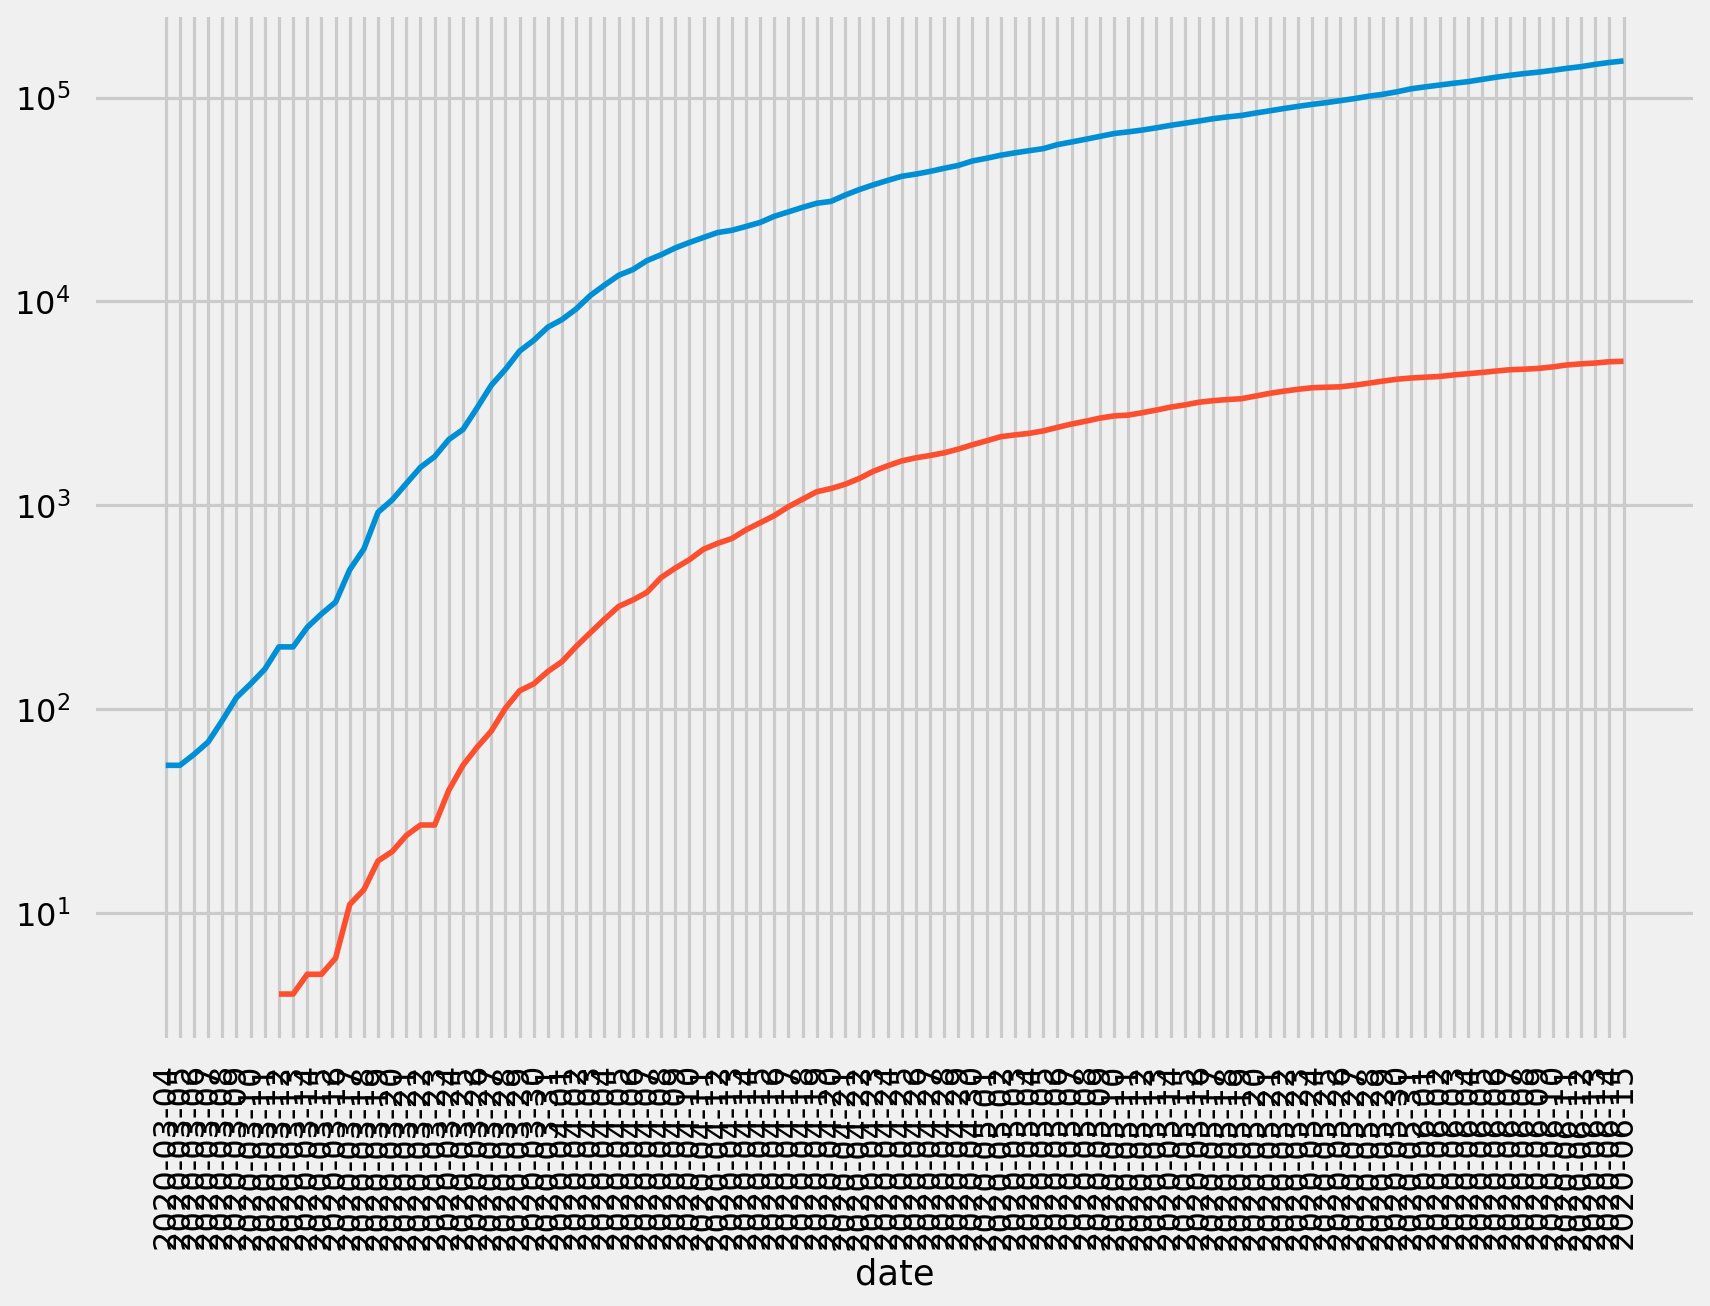

In [14]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax = sns.lineplot(x="date", y="death", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
ax.set_ylabel('')
ax.set_yscale('log')
plt.show()

## New York

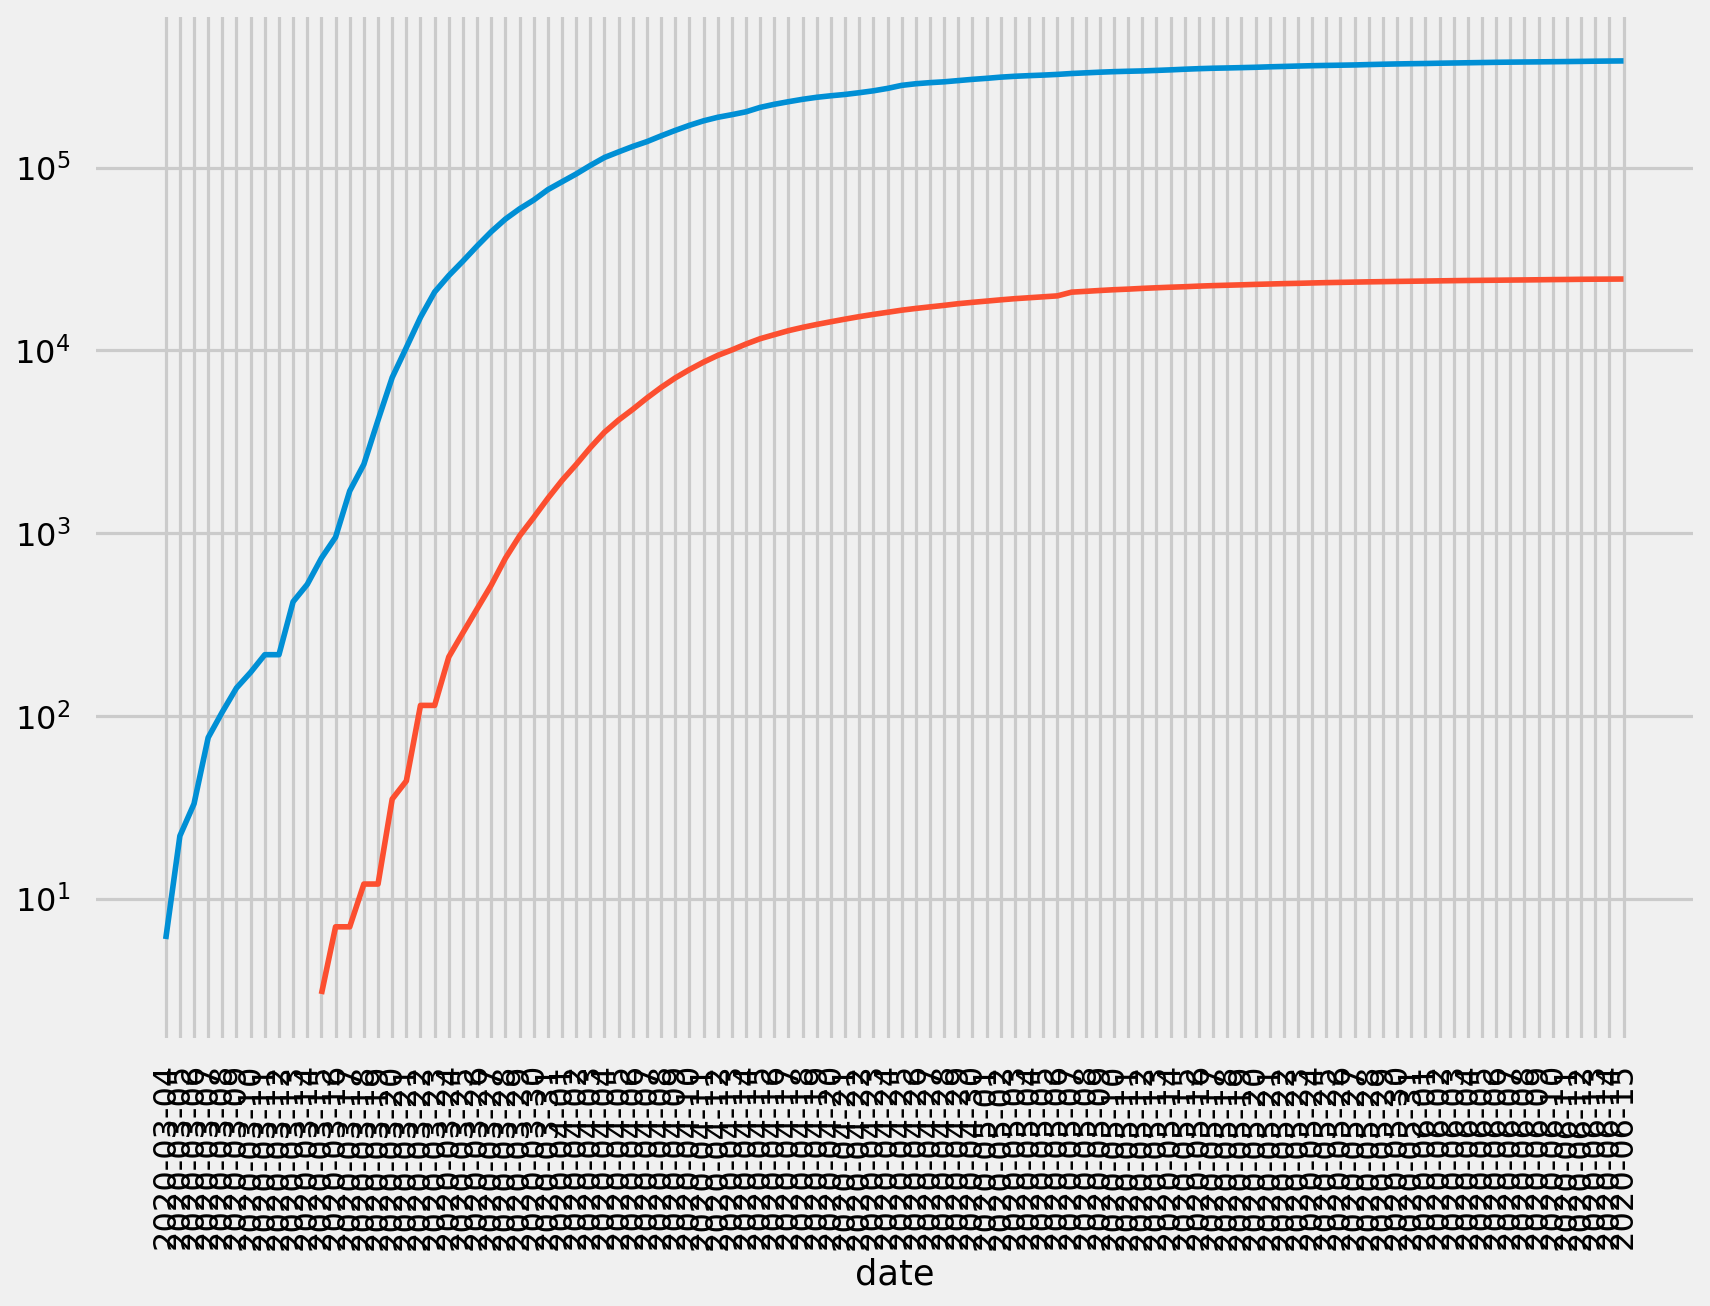

In [15]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "NY"'))
ax = sns.lineplot(x="date", y="death", 
                  data=df_states.query('state == "NY"'))
ax.set(xticks=df_states.query('state == "NY"').date.values)
plt.xticks(rotation=90)
ax.set_ylabel('')
ax.set_yscale('log')
plt.show()

# Top 10 States by Deaths

In [16]:
latest_date = df_states['date'].max()
top_states = df_states.query('date == @latest_date').sort_values(by='death', 
                                                    ascending=False).state.head(10).tolist()
df_top_states = df_states.query('state == @top_states')
top_states

['NY', 'NJ', 'MA', 'IL', 'PA', 'MI', 'CA', 'CT', 'FL', 'LA']

In [17]:
df_states.query('date == @latest_date').sort_values(by='death', 
                                                    ascending=False)[['state', 'death']]

,state,death
3477,NY,24579.0
3169,NJ,12676.0
1945,MA,7647.0
1434,IL,6507.0
3889,PA,6243.0
2245,MI,6017.0
409,CA,5089.0
616,CT,4204.0
922,FL,3030.0
1844,LA,3018.0


In [18]:
# Deaths per 100,000 people
df_states.query('date == @latest_date').sort_values(by='death_rate', 
                                                    ascending=False)[['state', 'death_rate']]

,state,death_rate
3169,NJ,142.290751
3477,NY,125.773908
616,CT,117.671262
1945,MA,110.791581
4083,RI,80.486894
717,DC,73.314305
1844,LA,64.764254
2245,MI,60.194589
1434,IL,51.071024
2041,MD,48.769444


# Deaths

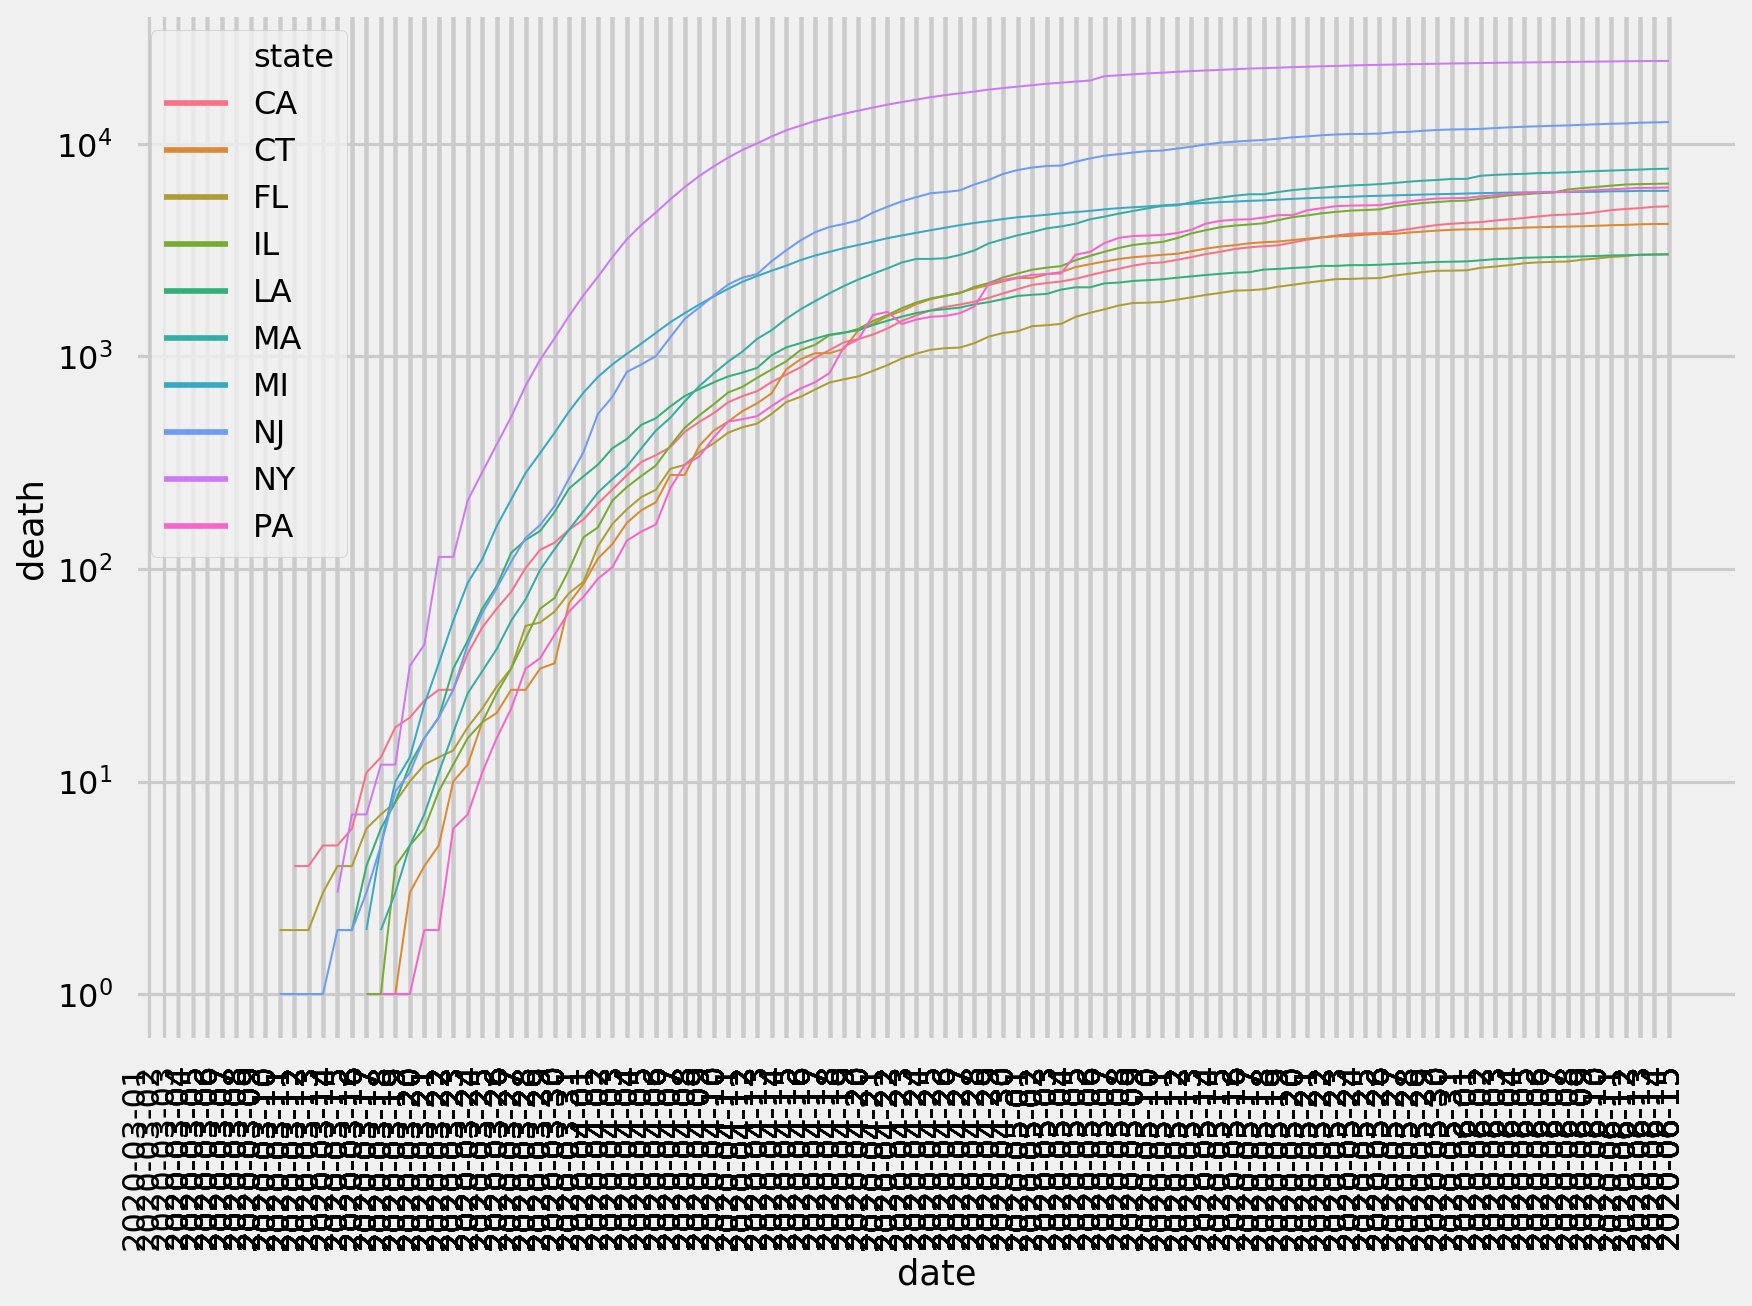

In [19]:
ax = sns.lineplot(x="date", 
                  y="death", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Deaths (7-day Moving Average)

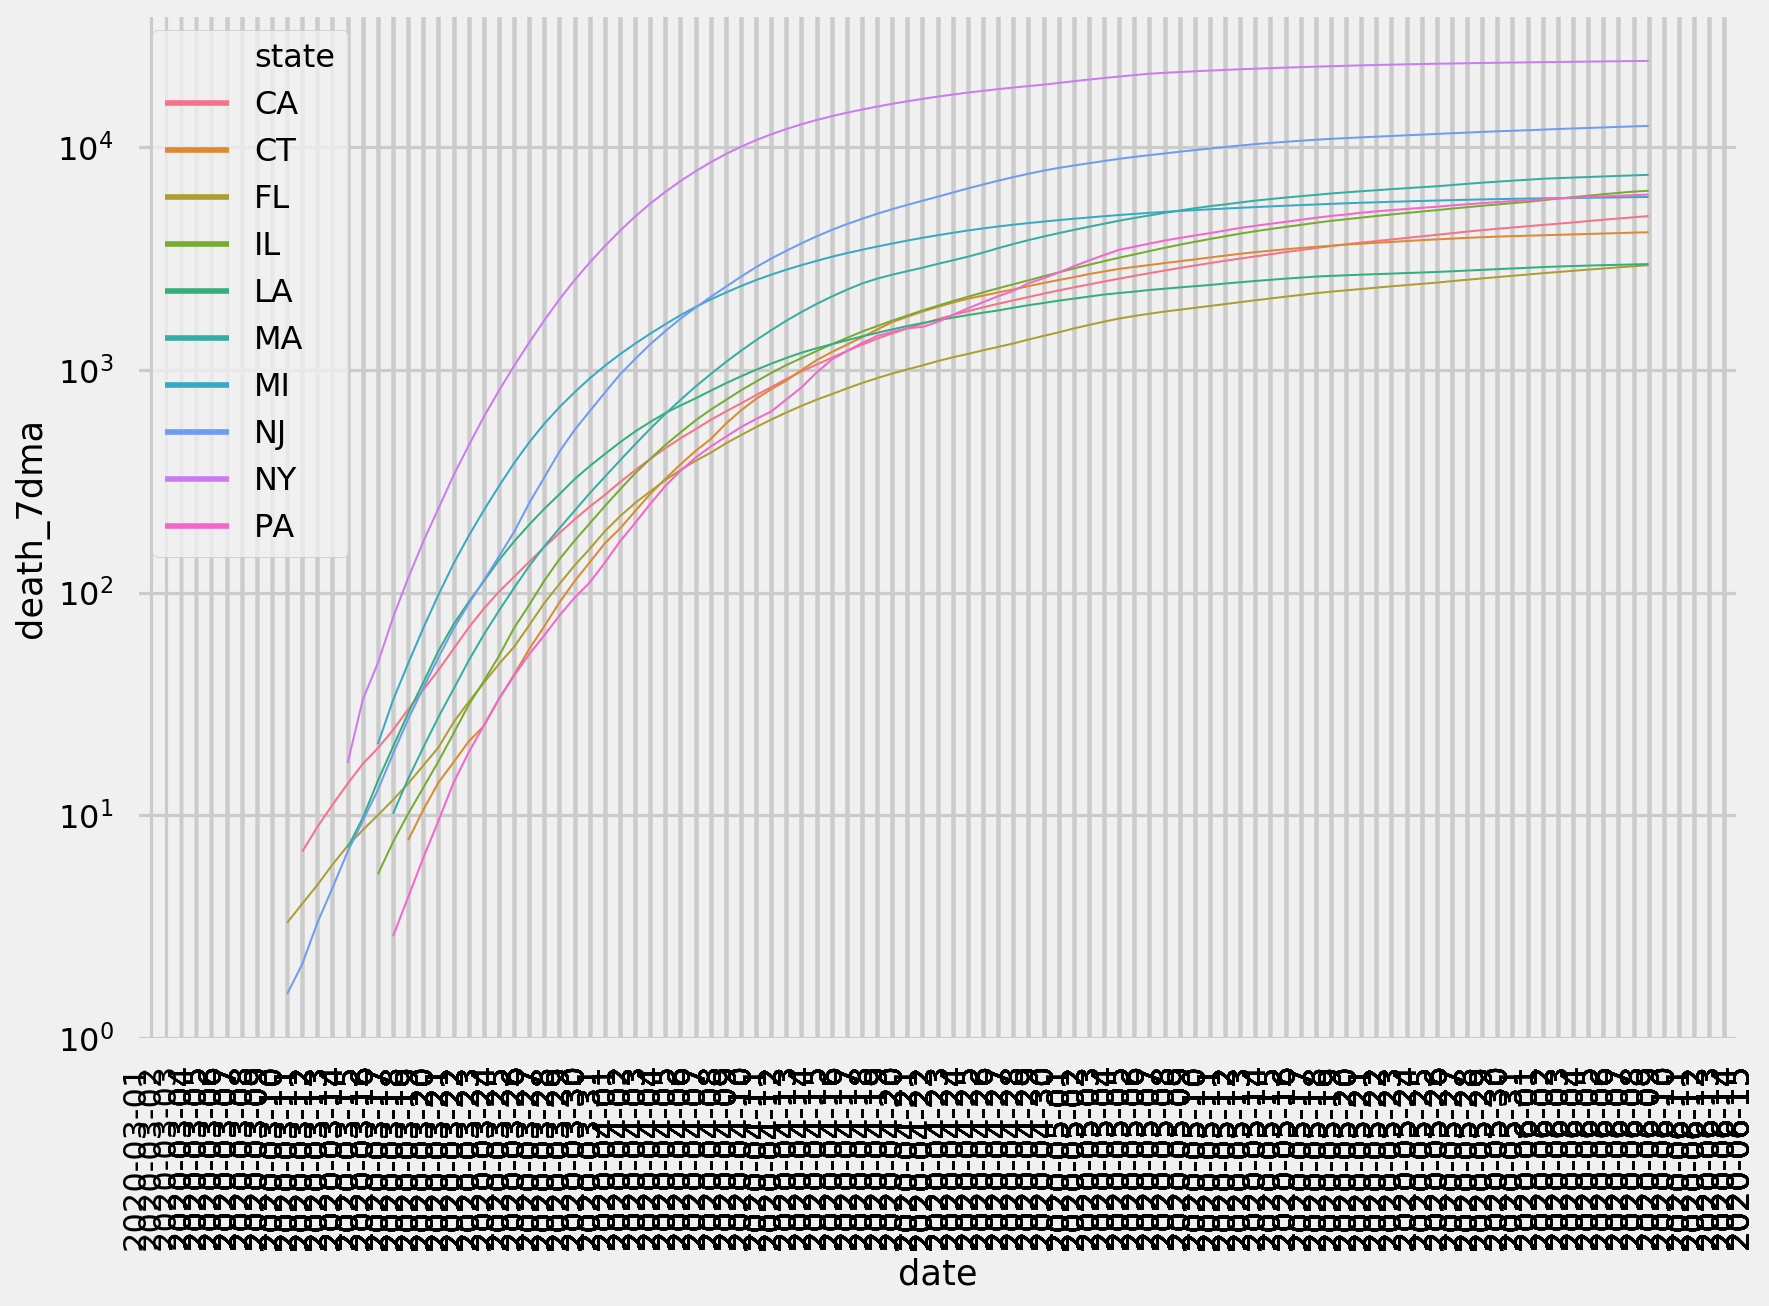

In [20]:
# TODO: index this by date first crossed 5 deaths
ax = sns.lineplot(x="date", 
                  y="death_7dma", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Positive Cases Per 100,000 People

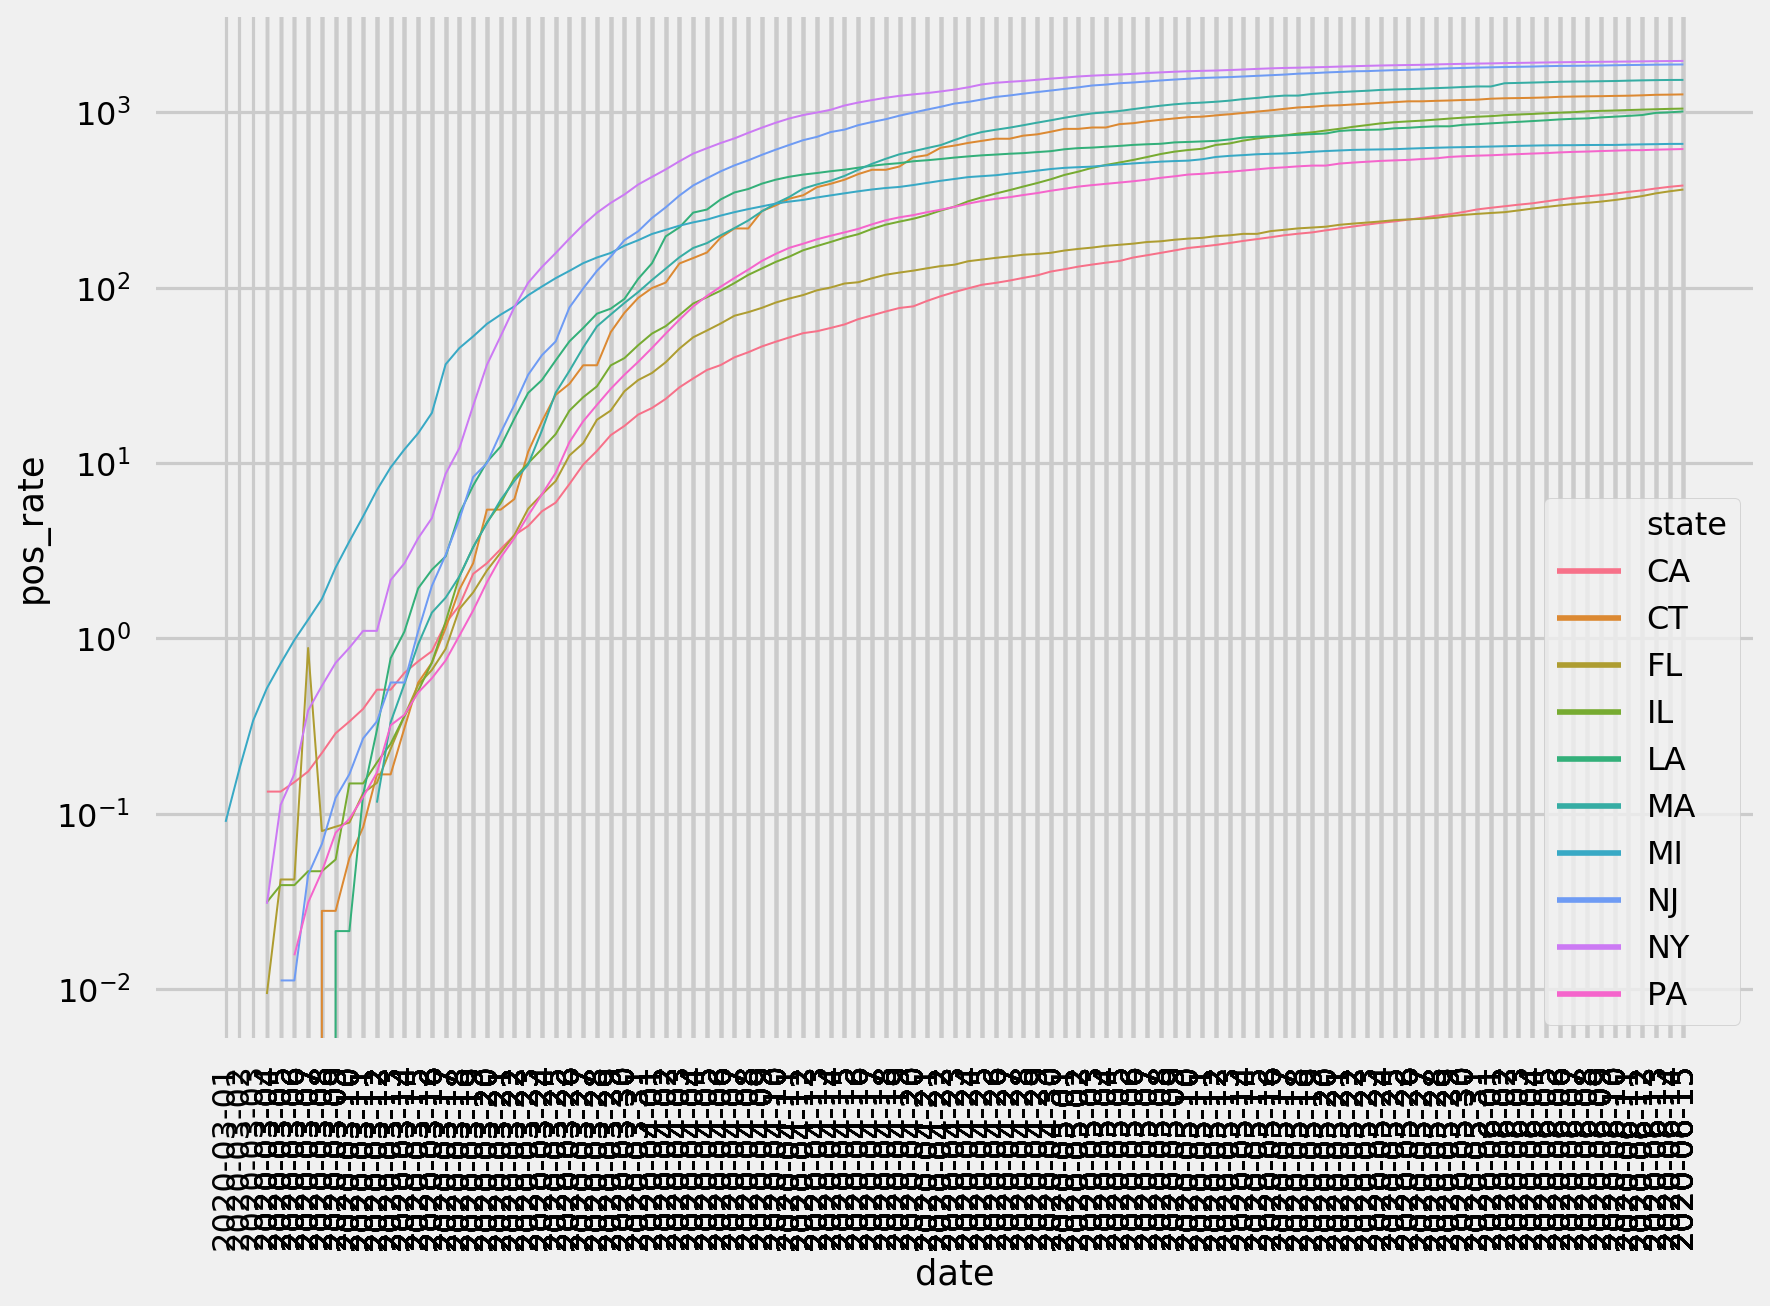

In [21]:
ax = sns.lineplot(x="date", y="pos_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Deaths Per 100,000 People

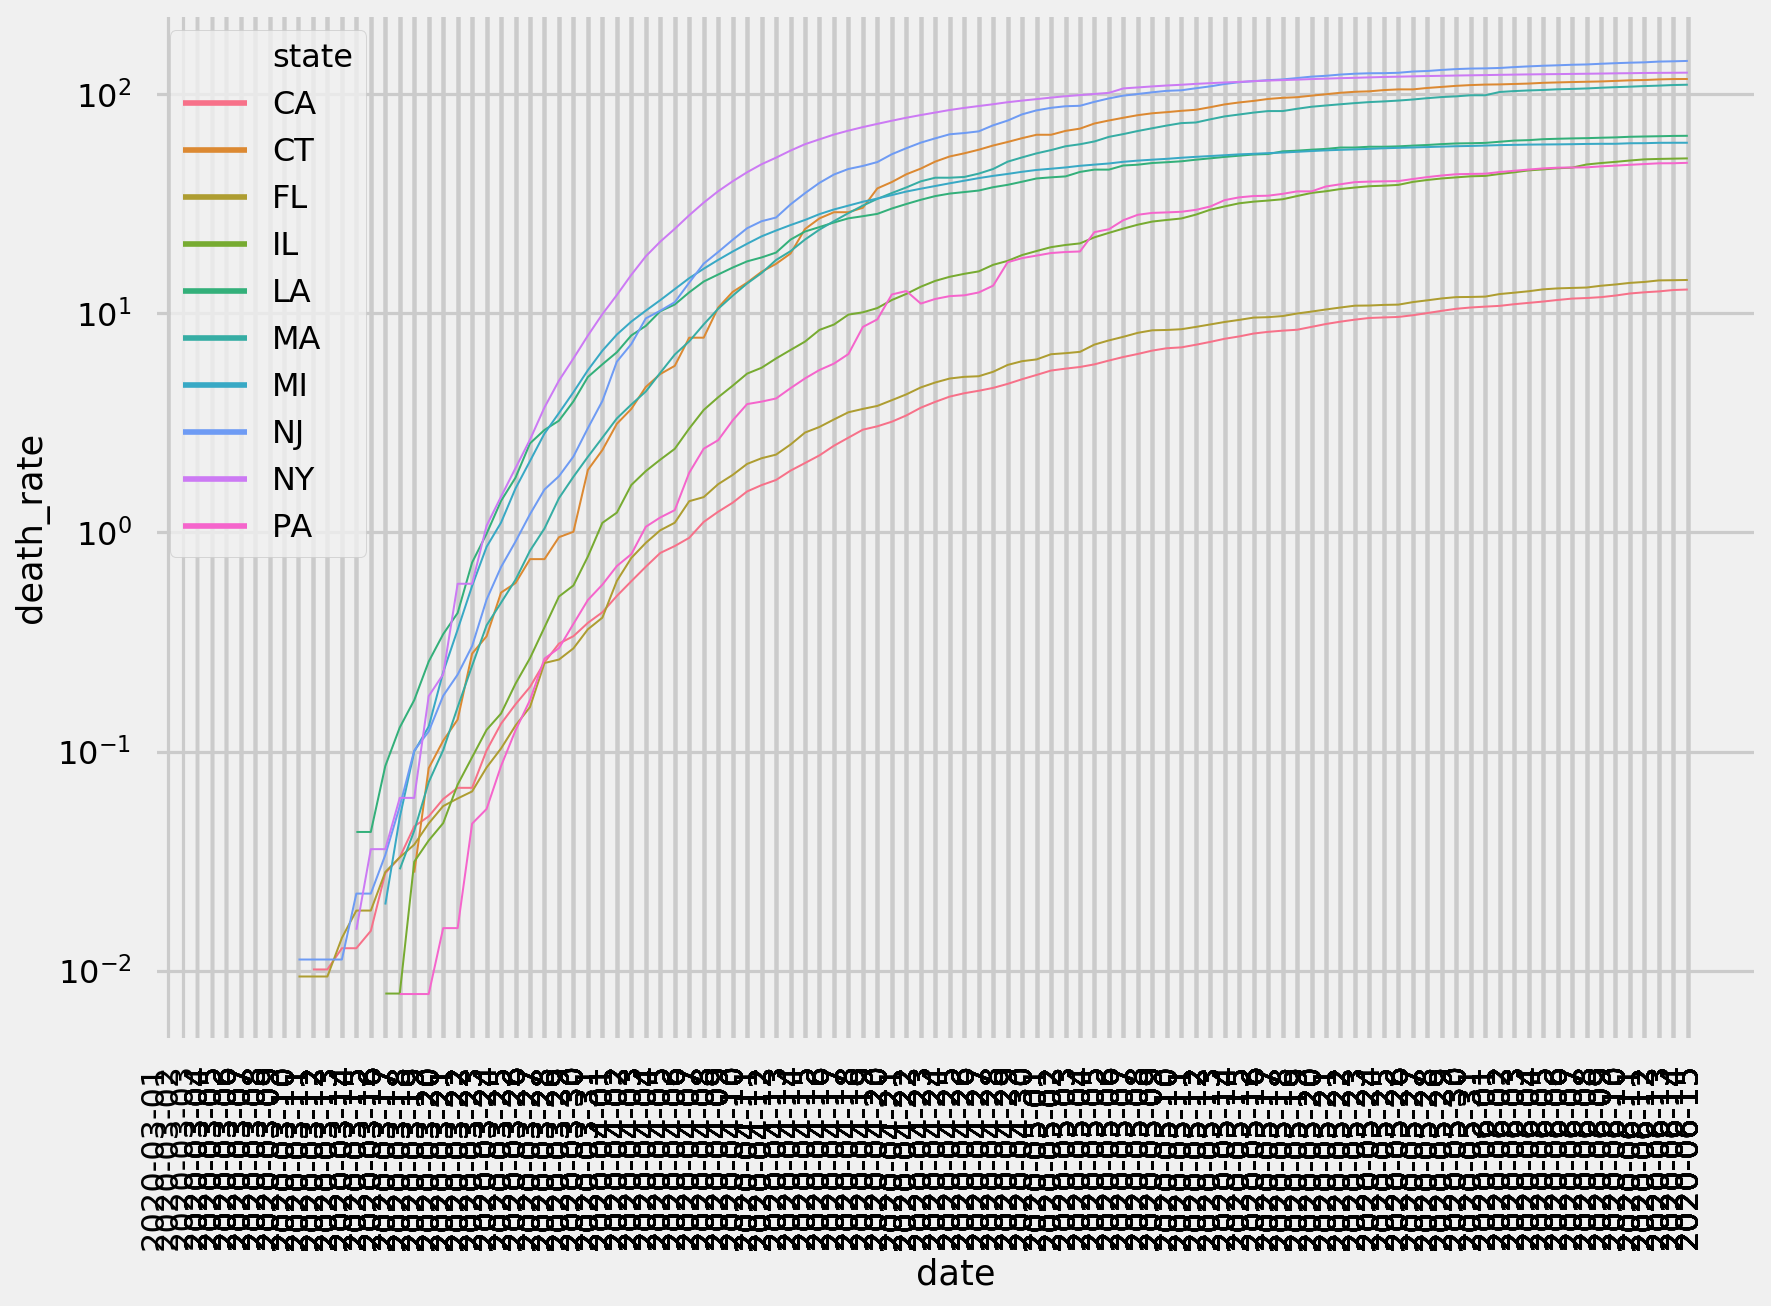

In [22]:
ax = sns.lineplot(x="date", y="death_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Tests Per 100,000 People

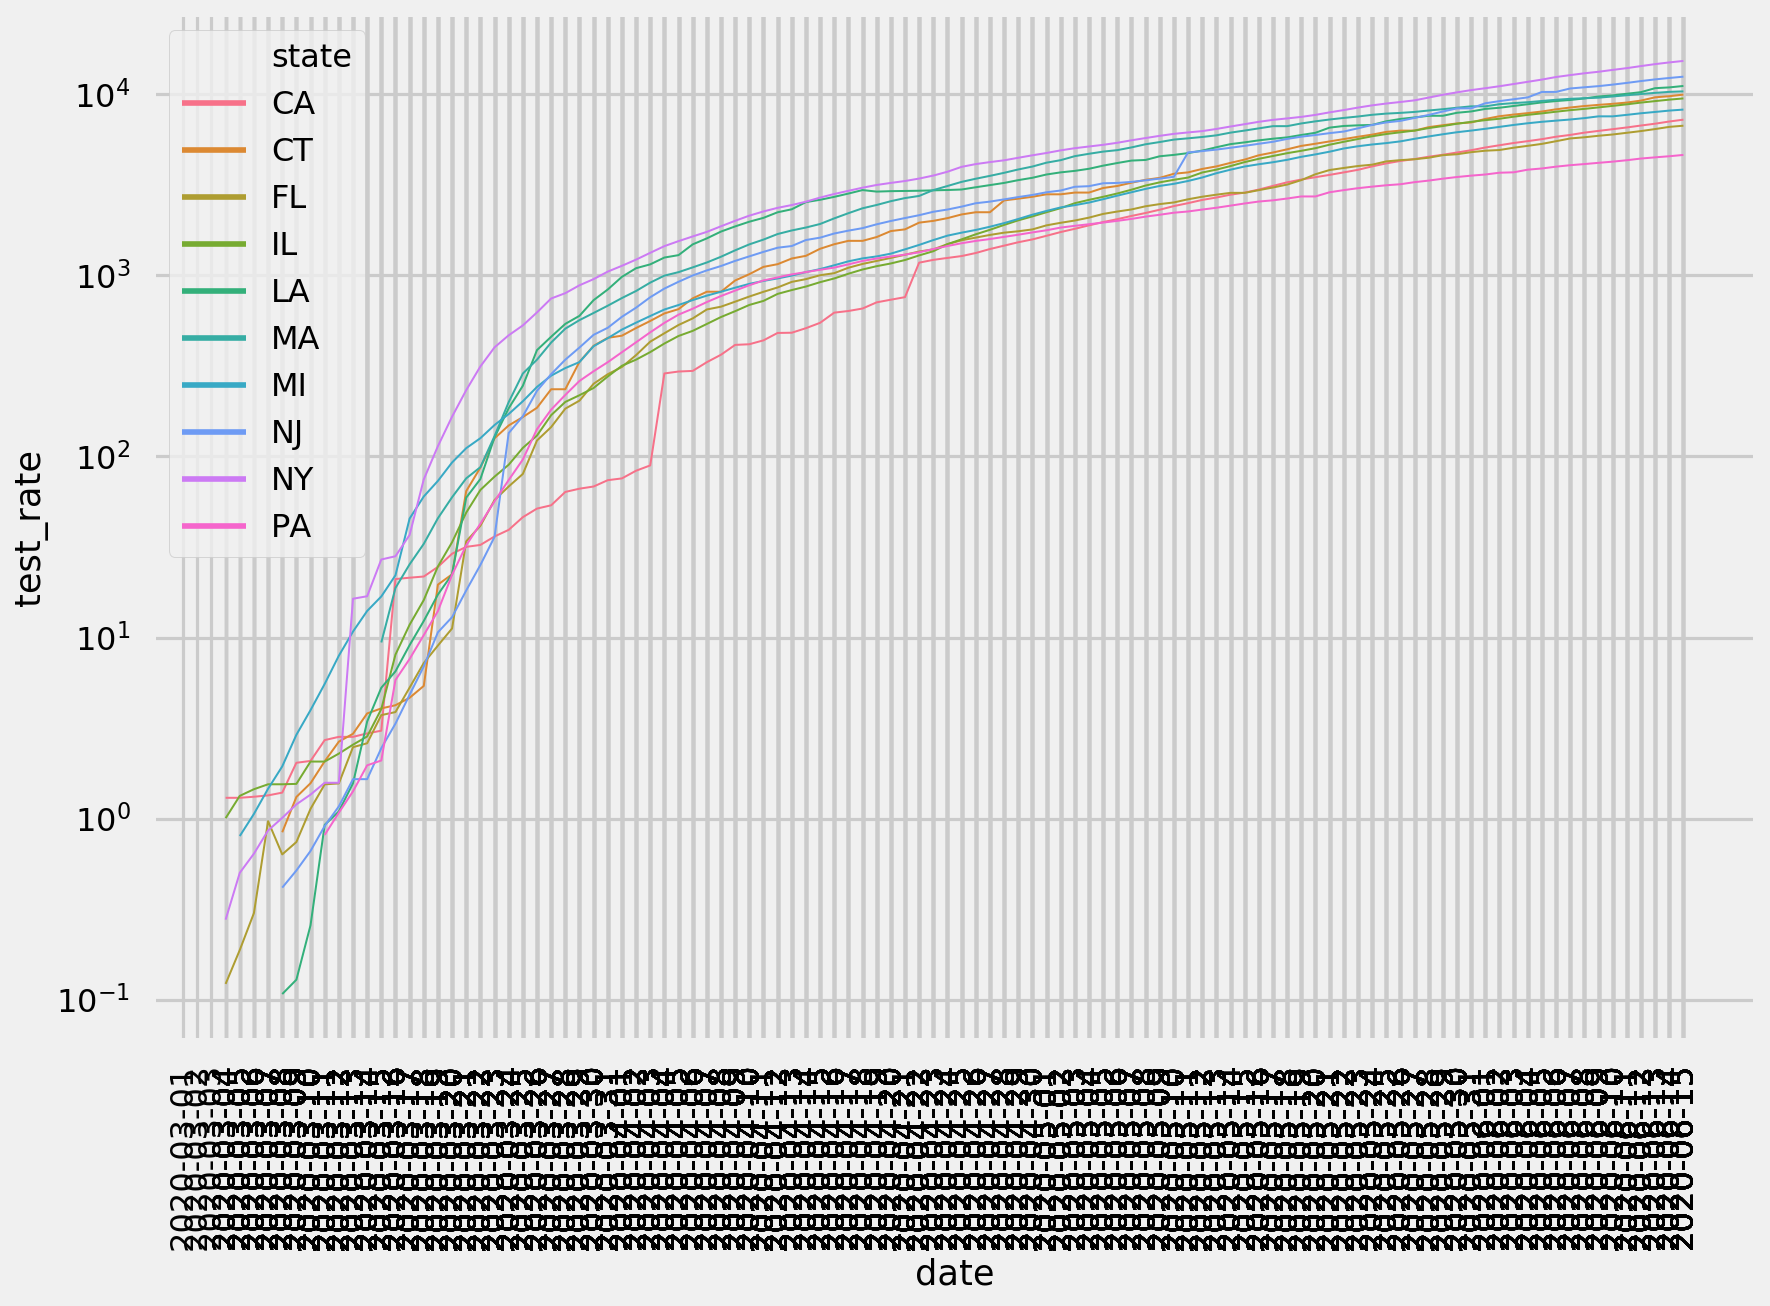

In [23]:
ax = sns.lineplot(x="date", y="test_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

In [24]:
df_states.query('date == @latest_date').sort_values(by='test_rate', 
                                                    ascending=False)[['state', 'test_rate']]

,state,test_rate
4083,RI,18957.926446
3477,NY,15306.406763
3272,NM,12582.870898
3169,NJ,12528.265077
2861,ND,11548.303659
1844,LA,11131.490320
1945,MA,10391.415775
0,AK,10094.001123
616,CT,9975.102619
1434,IL,9500.552543
